### Registation using optical flow
[link to example](https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py)

Demonstration of image using optical flow.

By definition, the optical flow is the vector field *(u, v)* veryfying *image_left(x, y) = image_right(x+u, y+v)* where *(image_left, image_right)* is a couple of consecutive 2D frames from a sequence. This vector field can then be used for registration by image warping.

To display registration results, an RGB image is constructed by assigning the result of the registration to the red channel and the target image to the green and blue channels. A perfect registration results in a gray level image while misregistered pixels appear colored in the constructed RGB image.

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


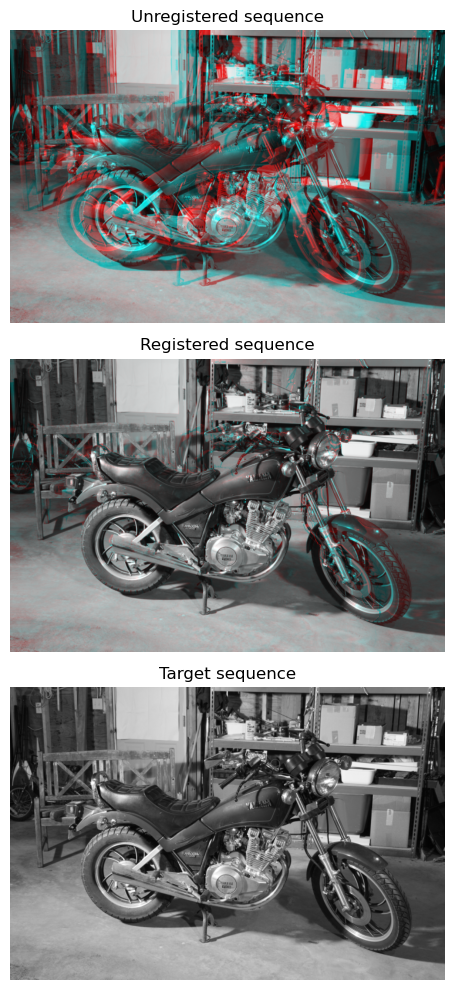

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk

image_left, image_right, disparities = stereo_motorcycle()
image_left = rgb2gray(image_left)
image_right = rgb2gray(image_right)

v, u = optical_flow_tvl1(image_left, image_right)

# use estimated optical flow for registrartion
nr, nc = image_left.shape
row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc), indexing='ij')
image_right_wrap = warp(image_right, np.array([row_coords + v, col_coords + u]), mode='edge')

# build RGB image with the unregistered sequence
unregistered = np.zeros((nr, nc, 3))
unregistered[..., 0] = image_right
unregistered[..., 1] = image_left
unregistered[..., 2] = image_left

# build RGB image with registered sequence
registered = np.zeros((nr, nc, 3))
registered[..., 0] = image_right_wrap
registered[..., 1] = image_left
registered[..., 2] = image_left

# build RGB target image with registered sequence
target = np.zeros((nr, nc, 3))
target[..., 0] = image_left
target[..., 1] = image_left
target[..., 2] = image_left

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(unregistered)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(registered)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target)
ax2.set_title("Target sequence")
ax2.set_axis_off()

fig.tight_layout()

The estimated vector field *(u, v)* can also be displayed with a quiver plot.

In the following example, Iterative Lukas-Kanade algorithm (iLK) is applied to images of particles in the context of particle image velocimetry (PIV).

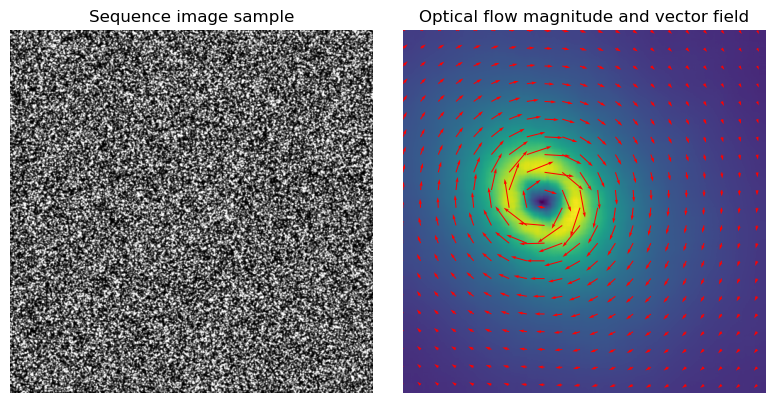

In [2]:
image_left, image_right = vortex()

v, u = optical_flow_ilk(image_left, image_right, radius=15)

# compute flow magnitude
norm = np.sqrt(u ** 2 + v ** 2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# sequence image sample
ax0.imshow(image_left, cmap='gray')
ax0.set_title("Sequence image sample")
ax0.set_axis_off()

# prepare quiver plot
nvec = 20 # number of vectors to be displayed along each image dimansion
nl, nc = image_left.shape
step = max(nl//nvec, nc//nvec)

y, x = np.mgrid[:nl:step, :nc:step]
u_ = u[::step, ::step]
v_ = v[::step, ::step]

ax1.imshow(norm, cmap='viridis')
ax1.quiver(x, y, u_, v_, color='r', units='dots', angles='xy', scale_units='xy', lw=3)
ax1.set_title("Optical flow magnitude and vector field")
ax1.set_axis_off()
fig.tight_layout()

plt.show()